Objective:
The objective of this assignment is to implement PCA on a given dataset and analyse the results.

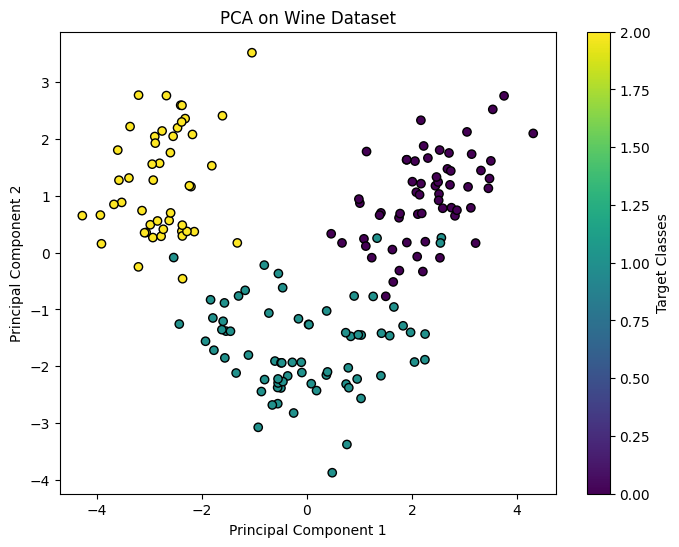

             Metric     Value
0  Silhouette Score  0.561051


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

# Load Wine dataset
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Standardizing the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Applying PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

df_pca = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])

# Scatter Plot of PCA Results
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=data.target, cmap='viridis', edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Wine Dataset')
plt.colorbar(label='Target Classes')
plt.show()

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(df_pca)

# Evaluate clustering performance using silhouette score
silhouette_avg = silhouette_score(df_pca, kmeans_labels)

# Creating a Performance Metrics Table
performance_metrics = pd.DataFrame({
    'Metric': ['Silhouette Score'],
    'Value': [silhouette_avg]
})
print(performance_metrics)
